In [2]:
import numpy as np
import math as mh
import matplotlib.pyplot as plt
from sympy import diff
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

выпишем заданные значения:

In [3]:
x0 = 0.52360
x1 = 0.87267
x2 = 1.22173
x3 = 1.57080
x4 = 1.91986
x5 = 2.26893

In [4]:
y0 = 14*(10**(-6))
y1 = 0.00037
y2 = 0.00352
y3 = 0.01971
y4 = 0.08033
y5 = 0.26380

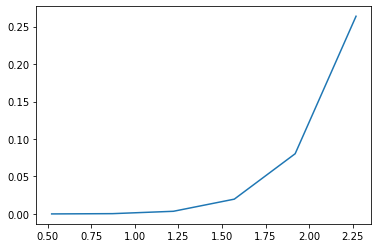

In [5]:
plt.figure()
plt.plot([x0, x1, x2, x3, x4, x5], [y0, y1, y2, y3, y4, y5])
plt.show()

Найдем алгебраический интерполяционный многочлен в форме Ньютона:

In [6]:
b = []
b0 = y0
b.append(b0)
b1 = (y1-y0)/(x1-x0)
b.append(b1)
b2 = ((y2-y1)/(x2-x1)-(y1-y0)/(x1-x0))/(x2-x0)
b.append(b2)
b3 = ((((y3-y2)/(x3-x2)-(y2-y1)/(x2-x1))/(x3-x1)) - (((y2-y1)/(x2-x1)-(y1-y0)/(x1-x0))/(x2-x0)))/(x3-x0)
b.append(b3)
b4 = (((((y4-y3)/(x4-x3)-(y3-y2)/(x3-x2))/(x4-x2)) - (((y3-y2)/(x3-x2)-(y2-y1)/(x2-x1))/(x3-x1)))/(x4-x1) - ((((y3-y2)/(x3-x2)-(y2-y1)/(x2-x1))/(x3-x1)) - (((y2-y1)/(x2-x1)-(y1-y0)/(x1-x0))/(x2-x0)))/(x3-x0))/(x4-x0)
b.append(b4)
b5 = ((((((y5-y4)/(x5-x4)-(y4-y3)/(x4-x3))/(x5-x3)) - (((y4-y3)/(x4-x3)-(y3-y2)/(x3-x2))/(x4-x2)))/(x5-x2) - ((((y4-y3)/(x4-x3)-(y3-y2)/(x3-x2))/(x4-x2)) - (((y3-y2)/(x3-x2)-(y2-y1)/(x2-x1))/(x3-x1)))/(x4-x1))/(x5-x1) - (((((y4-y3)/(x4-x3)-(y3-y2)/(x3-x2))/(x4-x2)) - (((y3-y2)/(x3-x2)-(y2-y1)/(x2-x1))/(x3-x1)))/(x4-x1) - ((((y3-y2)/(x3-x2)-(y2-y1)/(x2-x1))/(x3-x1)) - (((y2-y1)/(x2-x1)-(y1-y0)/(x1-x0))/(x2-x0)))/(x3-x0))/(x4-x0))/(x5-x0)
b.append(b5)

In [7]:
b

[1.4e-05,
 0.0010198527515971009,
 0.011465463121975645,
 0.04014839986102394,
 0.059345771399216964,
 0.0416111727326075]

Получили интерполяционный многочлен: $P_{N} = b_{0} + b_{1}(x-x_{0}) + b_{2}(x-x_{0})(x-x_{1}) + b_{3}(x-x_{0})(x-x_{1})(x-x_{2}) + b_{4}(x-x_{0})(x-x_{1})(x-x_{2})(x-x_{3}) + b_{5}(x-x_{0})(x-x_{1})(x-x_{2})(x-x_{3})(x-x_{4})$
Построим элементы сплайна для отрезоков, указанных в условии. $S_{3i}(x) = (a_{0})_{i} + (a_{1})_{i}x_{i} + (a_{2})_{i}x^{2}_{i} + (a_{3})_{i}x^{3}_{i} $

Чтобы найти коэфф $a_{i}$ необходимо посчитать производную от интерполяционного многочлена $P_{N}$

Соответственно: 

$P'_{N} = b_{1} + b_{2}(2x-x_{0}-x_{1}) + b_{3}(3x^{2}-2xx_{2}-2xx_{1}-2xx_{0}+x_{1}x_{2}+x_{0}x_{2}-x_{0}x_{1}) + ...$

In [8]:
def pder(b1, b2, b3, b4, b5, x0, x1, x2, x3, x4, x):
    pd = b1 + b2*(x-x0)+b2*(x-x1) + b3*(x-x1)*(x-x2) + b3*(x-x0)*(x-x2) + b3*(x-x0)*(x-x1) + b4*(x-x1)*(x-x2)*(x-x3) + b4*(x-x0)*(x-x2)*(x-x3) + b4*(x-x0)*(x-x1)*(x-x3) + b4*(x-x0)*(x-x1)*(x-x2) + b5*(x-x1)*(x-x2)*(x-x3)*(x-x4) + b5*(x-x0)*(x-x2)*(x-x3)*(x-x4) + b5*(x-x0)*(x-x1)*(x-x3)*(x-x4) + b5*(x-x0)*(x-x1)*(x-x2)*(x-x4) + b5*(x-x0)*(x-x1)*(x-x2)*(x-x3)
    return pd

In [9]:
pders = []
pd0 = pder(b1, b2, b3, b4, b5, x0, x1, x2, x3, x4, x0)
pders.append(pd0)
pd1 = pder(b1, b2, b3, b4, b5, x0, x1, x2, x3, x4, x1)
pders.append(pd1)
pd2 = pder(b1, b2, b3, b4, b5, x0, x1, x2, x3, x4, x2)
pders.append(pd2)
pd3 = pder(b1, b2, b3, b4, b5, x0, x1, x2, x3, x4, x3)
pders.append(pd3)
pd4 = pder(b1, b2, b3, b4, b5, x0, x1, x2, x3, x4, x4)
pders.append(pd4)
pd5 = pder(b1, b2, b3, b4, b5, x0, x1, x2, x3, x4, x5)
pders.append(pd5)
pders

[0.006483702441363905,
 0.0014717161916508715,
 0.02023300756939148,
 0.08628099131074497,
 0.29725573644159187,
 0.8249521574564569]

Найдем коэффициенты сплайна:

In [10]:
koeffs0 = []
koeffs1 = []
koeffs2 = []
koeffs3 = []
x = [x0, x1, x2, x3, x4, x5]
y = [y0, y1, y2, y3, y4, y5]

for i in range(5):
    a0 = ((-pders[i+1]*((x[i])**2)*(x[i+1])*(x[i+1] - x[i])+(y[i+1])*((x[i])**2)*(3*x[i+1]-x[i]))/((x[i+1]-x[i])**3) + (y[i]*(x[i+1]**2)*(x[i+1]-3*x[i])-pders[i]*x[i]*(x[i+1]**2)*(x[i+1]-x[i]))/((x[i+1]-x[i])**3))
    koeffs0.append(a0)

for i in range(5):
    a1 = (pders[i+1]*x[i]*(2*x[i+1]+x[i])*(x[i+1]-x[i])-6*(y[i+1]-y[i])*x[i]*x[i+1])/((x[i+1]-x[i])**3) + (pders[i]*x[i+1]*(x[i+1]+2*x[i])*(x[i+1]-x[i]))/((x[i+1]-x[i])**3)
    koeffs1.append(a1)
    
for i in range(5):
    a2 = (-pders[i+1]*(x[i+1]-x[i])*(x[i+1]+2*x[i])+3*(y[i+1]-y[i])*(x[i+1]+x[i]))/((x[i+1]-x[i])**3) - (pders[i]*(x[i+1]-x[i])*(x[i]+2*x[i+1]))/((x[i+1]-x[i])**3)
    koeffs2.append(a2)
    
for i in range(5):
    a3 = (pders[i+1]*(x[i+1]-x[i])-2*(y[i+1]-y[i])+pders[i]*(x[i+1]-x[i]))/((x[i+1]-x[i])**3)
    koeffs3.append(a3)


Интерполяционный многочлен и сплайн построены, сделаем теперь так, чтобы их можно было наглядно рассмотреть

In [11]:
#вывод сплайна в произвольной точке
x = 1.5 #произвольная точка от х0 до х5
if (x >= x0) and (x < x1):
    s = koeffs0[0] + koeffs1[0]*x + koeffs2[0]*(x**2) + koeffs3[0]*(x**3)
if (x >= x1) and (x < x2):
    s = koeffs0[1] + koeffs1[1]*x + koeffs2[1]*(x**2) + koeffs3[1]*(x**3)    
if (x >= x2) and (x < x3):
    s = koeffs0[2] + koeffs1[2]*x + koeffs2[2]*(x**2) + koeffs3[2]*(x**3)    
if (x >= x3) and (x < x4):
    s = koeffs0[3] + koeffs1[3]*x + koeffs2[3]*(x**2) + koeffs3[3]*(x**3)    
if (x >= x4) and (x <= x5):
    s = koeffs0[4] + koeffs1[4]*x + koeffs2[4]*(x**2) + koeffs3[4]*(x**3)    
    
print(s)

0.0143317171055653


In [12]:
#вывод многочлена и производной многочлена

P = b0 + b1*(x-x0) + b2*(x-x0)*(x-x1) + b3*(x-x0)*(x-x1)*(x-x2) + b4*(x-x0)*(x-x1)*(x-x2)*(x-x3) + b5*(x-x0)*(x-x1)*(x-x2)*(x-x3)*(x-x4)
print(P)

pp = pder(b1, b2, b3, b4, b5, x0, x1, x2, x3, x4, x)
print(pp)

0.014370522344215885
0.06541254403206685
